In [1]:
# Predicting Survival in the Titanic Data Set
# We will be using a decision tree to make predictions about the Titanic data
# set from Kaggle. This data set provides information on the Titanic
# passengers and can be used to predict whether a passenger survived or
# not.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


In [4]:
Url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'


In [5]:
titanic = pd.read_csv(Url)

In [6]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [7]:
# Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  E mbarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

In [12]:
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

In [14]:
# We can use nunique to find the number of unique values for each feature
titanic.nunique()
# Or use describe again with the flag to include 0's and hence consider categorical values as well
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,E mbarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elias, Mr. Tannous",male,CA. 2343,G6,S
freq,1,577,7,4,644


## Pivot features against Survival


In [15]:
titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data visualization

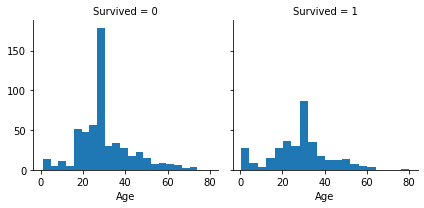

In [19]:
# use a facetgrid (FacetGrid is used to draw plots with multiple Axes 
# where each Axes shows the same relationship conditioned on different levels of some variable.
# It’s possible to condition on up to three variables by assigning variables 
# to the rows and columns of the grid and using different colors for the plot elements.)

g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Observations
Young Children had a high survival rate (>20%)

Many 15-25 year olds did not survive.

Majority of passengers are in the 15-35 age range.

C:\Users\sreeh\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


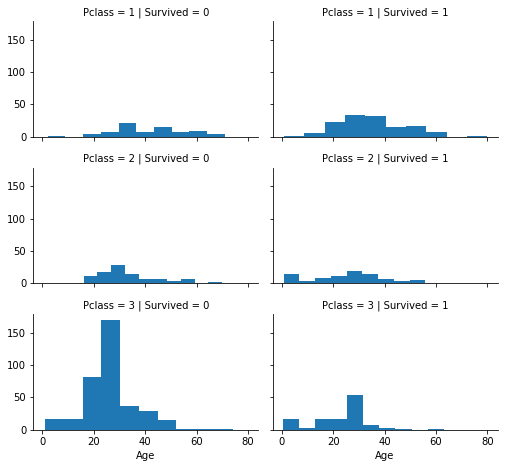

In [20]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6 )
grid.map(plt.hist, 'Age')
grid.add_legend()

### Observations
Pclass=3 had the most passengers but most of them did not survive. The youngest passengers (ie less than 5) in Pclass=2 and Pclass=3 mostly survived. Most passengers in Pclass=1 survived. Pclass varies in terms of Age distribution of passengers.

Based on these observations, Pclass is good to consider for model training

C:\Users\sreeh\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\sreeh\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


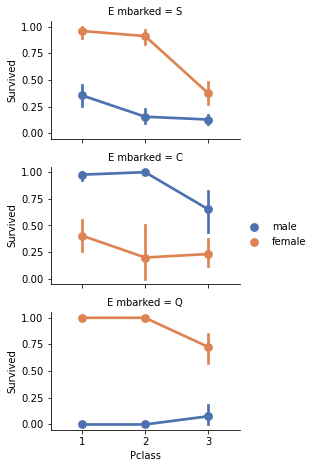

In [21]:
grid = sns.FacetGrid(titanic, row='E mbarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Observations
PClass 1 and 2 generally had higher survival rates
Females in 2 of the 3 embarkment points had significantly higher survival rates than males. A similar pattern is observed for the other embarkment point for males (C)
Point of embarkment does have a varying effect on survival for males.

C:\Users\sreeh\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sreeh\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


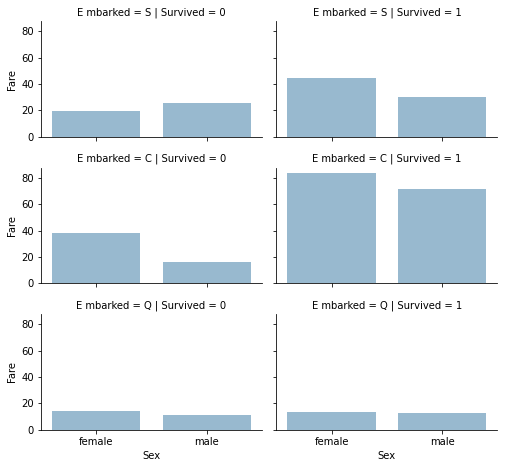

In [22]:
grid = sns.FacetGrid(titanic, row='E mbarked', col='Survived',size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

### Observations
Embarkment point affects survival
Again, in general females have higher survival rate
Higher paying passengers had higher survival rate

## converting categorical feature to numerical feature


In [23]:
titanic= pd.get_dummies(titanic, columns= ['Sex','E mbarked'], drop_first=True)

In [24]:
titanic.drop(['Cabin', 'Ticket','Name','PassengerId'], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,E mbarked_Q,E mbarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [25]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [27]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

ValueError: could not convert string to float: 'Nicola-Yarred, Miss. Jamila'

C:\Users\sreeh\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,E mbarked_Q,E mbarked_S


In [ ]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# decisiontree = DecisionTreeClassifier()
# decisiontree.fit(x_train, y_train)
# y_pred = decisiontree.predict(x_val)
# acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_decisiontree)